<a href="https://colab.research.google.com/github/iolopezm/Analitica-de-Negocios/blob/main/PARCIAL_1_IOLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerias



In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Cargar base de datos

In [ ]:
nxl='/content/sample_data/4. BD_Parcial__int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna() #Eliminar celdas vacias
XDB['Sex'] = XDB['Sex'].replace({'M':0,'F':1}) #Convertir la variable sex como una variable categorica

#Seleccion de las variables de trabajo
XD=np.array(XDB[['White', 'HS GPA', 'SAT', 'GPA', 'College Parent']]) #Datos entrada
yd=np.array(XDB[['Grad']]) #Dato que el modelo va a pronosticar

# **PREGUNTA 1**

¿Determinar cuales son las variables que tienen una mayor correlación entre ellas, teniendo en cuenta para este análisis la variable de pronóstico o variable de salida ‘Grad’?

*Matriz de Correlación*

In [ ]:
corr = XDB.corr() #Matriz de correlacion
corr

,Sex,White,HS GPA,SAT,GPA,College Parent,Grad
Sex,1.000000,0.029289,0.030116,-0.171818,0.171945,-0.021320,0.163517
White,0.029289,1.000000,0.130981,0.191930,0.194132,-0.005987,0.133612
HS GPA,0.030116,0.130981,1.000000,0.346767,0.376932,0.020068,0.283404
SAT,-0.171818,0.191930,0.346767,1.000000,0.260927,-0.029768,0.172794
GPA,0.171945,0.194132,0.376932,0.260927,1.000000,-0.015137,0.726624
College Parent,-0.021320,-0.005987,0.020068,-0.029768,-0.015137,1.000000,-0.018035
Grad,0.163517,0.133612,0.283404,0.172794,0.726624,-0.018035,1.000000


In [ ]:
corr['Grad'].sort_values(ascending=False)[1:] #Ordenar de mayor a menor

,Grad
GPA,0.726624
HS GPA,0.283404
SAT,0.172794
Sex,0.163517
White,0.133612
College Parent,-0.018035


Las variables con mayor correlacion con respecto a la variable de pronostico 'Grad' son:



*   Grad - GPA: 0.72
*   Grad - HS GPA: 0.28



# **PREGUNTA 2**

¿Cuáles son las dos variables que tienen mayor correlación frente a la graficación de los datos?

*Matriz de correlación - gráfica*

<Axes: >

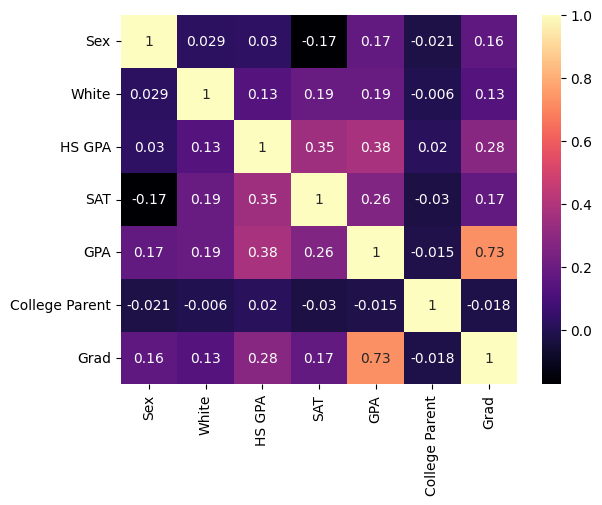

In [ ]:
sns.heatmap(XDB.corr(), annot=True, cmap = 'magma')

Entre las otras variables independientes la mayor correlación se da entre:

*  GPA - HS GPA: 0.38
*  SAT - HS GPA: 0.35


# **PREGUNTA 3**

¿Cuál es el grupo de clasificación que logró la mayor calificación en la preparatoria (HS GPA) y el promedio de la Universidad (GPA)?

In [ ]:
XDB.columns

Index(['Sex', 'White', 'HS GPA', 'SAT', 'GPA', 'College Parent', 'Grad'], dtype='object')

In [ ]:
mnb=GaussianNB()
mnb.fit(XD,yd) # Ajustar el modelo a los datos de entrada y salida
ydp=mnb.predict(XD) # Pronostico intramuestral

#Parametros del modelo por categoria - Graduado / NO graduado
u=mnb.theta_ #Se estiman las medias
sigma=np.sqrt(mnb.var_) #Se estiman las varianzas

#Variaciones de las variables
LI=u-sigma
LS=u+sigma

print('La media de las variables por categoria:')
print (u)
print('---')
print('El limite inferior de la variación de las variables por categoria es:')
print(LI)
print('---')
print('El limite superior de la variación de las variables por categoria es:')
print (LS)

#Métrica de evaluación - Como se comporto el modelo identificando Graduado / NO graduado
cm=confusion_matrix(yd,ydp) #Matriz de confusion


La media de las variables por categoria:
[[5.86038961e-01 3.70939935e+00 1.23485390e+03 2.43128247e+00
  6.98051948e-01]
 [7.21098266e-01 3.91479769e+00 1.28854769e+03 3.28720303e+00
  6.79913295e-01]]
---
El limite inferior de la variación de las variables por categoria es:
[[9.34763992e-02 3.33244695e+00 1.08319860e+03 1.95529138e+00
  2.38926686e-01]
 [2.72616229e-01 3.62226610e+00 1.15210925e+03 2.96953734e+00
  2.13381638e-01]]
---
El limite superior de la variación de las variables por categoria es:
[[1.07860152e+00 4.08635175e+00 1.38650919e+03 2.90727356e+00
  1.15717721e+00]
 [1.16958030e+00 4.20732928e+00 1.42498613e+03 3.60486872e+00
  1.14644495e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Array de arriba para los 'Grad = 0'

Array de abajo para los 'Grad = 1'

In [ ]:
print(f'La media del HS GPA de los NO graduados es: {np.round(u[0, 1], 4)}')
print(f'La media del HS GPA de los SI graduados es: {np.round(u[1, 1], 4)}')
print('---')
print(f'La media del GPA de los NO graduados es: {np.round(u[0, 3], 4)}')
print(f'La media del GPA de los SI graduados es: {np.round(u[1, 3], 4)}')

La media del HS GPA de los NO graduados es: 3.7094
La media del HS GPA de los SI graduados es: 3.9148
---
La media del GPA de los NO graduados es: 2.4313
La media del GPA de los SI graduados es: 3.2872


# **PREGUNTA 4**

¿De acuerdo con los índices de exactitud, sensibilidad y especificidad, determinar cómo fue el comportamiento del modelo?


In [ ]:
VN=cm[0,0] #Verdaderos negativos
FP=cm[0,1] #Falsos positivos
FN=cm[1,0] #Falsos negativos
VP=cm[1,1] #Verdaderos positivos

Exactitud=(VP+VN)/len(XD)
print('Exactitud:',Exactitud) #Comportamiento general

Sensibilidad=VP/(VP+FN)
print('Sensibilidad:',Sensibilidad) #Como se comporto frente a los positivos

Especificidad=VN/(VN+FP)
print('Especificidad:',Especificidad) #Como se comportaron frente a los negativos

Exactitud: 0.867
Sensibilidad: 0.9263005780346821
Especificidad: 0.7337662337662337


El modelo Naive Bayes presentó un rendimiento satisfactorio en la tarea de clasificación. La exactitud fue del 86,70%, lo que demuestra una capacidad sólida del modelo para predecir correctamente los casos generales. La sensibilidad alcanzó el 92,63%, que significa ser bueno en la identificación de estudiantes que completarán sus estudios en el plazo establecido. Sin embargo, mostró un una especificidad de 73,37%,  lo que sugiere que su desempeño ligeramente inferior en la clasificación de aquellos que no lo lograrán graduarse. En general, el modelo es bueno y en especial, stos resultados indican que el modelo es capaz de discriminar de manera efectiva los estudiantes que culminarán sus estudios a tiempo.

# **PREGUNTA 5**

¿Determinar la categoría a la cual pertenecen cada uno de los individuos de pronóstico (Hoja 2)?

*Predicciones y respuesta*

In [ ]:
Xun=np.array([[1, 4, 1260, 1.9, 1]]) #Persona 1
ydun=mnb.predict(Xun)
print(ydun)

[0]


In [ ]:
Xun=np.array([[1, 2.91, 1090, 2.719, 1]]) #Persona 2
ydun=mnb.predict(Xun)
print(ydun)

[0]


In [ ]:
Xun=np.array([[0, 3.58, 1210, 3.319, 1]]) #Persona 3
ydun=mnb.predict(Xun)
print(ydun)

[1]


Persona 1: NO graduado

Persona 2: No graduado

Persona 3: SI graduado

# **PREGUNTA 6**

*Ajustar un Modelo de Decision Tree*

¿Cuál fue el comportamiento que tuvo el modelo frente a los índices de exactitud, sensibilidad y especificidad, y comparar este comportamiento con el modelo Naive Bayes?


In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4) #4 niveles o variables de entrada
mar.fit(XD,yd)
ydp=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)

#Evaluamos el modelo
VN=cm [0,0]
FP=cm [0,1]
FN=cm[1,0]
VP=cm[1,1]

Ex=(VN+VP)/(VN+VP+FN+FP) #Porcentaje de los datos pronosticados correctamente
print('La exactitud alcanzada por el modelo es:',Ex)
Se= VP/(FN+VP)
print('La sensibilidad alcanzada por el modelo fue:',Se)
Es=VN/(VN+FP)
print('La especificidad alcanzada por el modelo fue:',Es)

[[ 422  194]
 [   2 1382]]
La exactitud alcanzada por el modelo es: 0.902
La sensibilidad alcanzada por el modelo fue: 0.9985549132947977
La especificidad alcanzada por el modelo fue: 0.685064935064935


El modelo de árbol de decisión tuvo un comportamiento bueno, con una exactitud de 90,2%, que explica que el modelo es altamente eficaz en la clasificación general de los casos. Su sensibilidad es extremadamente alta (99,86%), lo que indica una excelente capacidad para identificar correctamente a los graduados. No obstante, su especificidad es de 68,51%, demostrando que el modelo no es tan bueno para identificar correctamente a quienes no lograrán graduarse en el tiempo estipulado. En general, el árbol de decisión es muy efectivo para predecir los casos positivos, pero tiene menos precisión en la clasificación de los negativos.

Al comparar ambos modelos, se observa que el árbol de decisión es más adecuado para  para predecir a quienes lograrán graduarse, ya que tiene una mayor exactitud (90,2% vs. 86,7%) y una sensibilidad mayor (99,86% vs. 92,63%) en comparación con Naive Bayes. Naive Bayes, por su parte, es mejor en términos de especificidad (73,37% vs. 68,51%), ya que muestra una mayor precisión identificando quienes no se van a graduar. En resumen, el árbol de decisión es más eficaz para predecir graduaciones, mientras que Naive Bayes es más equilibrado en ambas clases.

# **PREGUNTA 7**

*Graficar el árbol*

Indicar las reglas del negocio que definen los nodos puros

In [ ]:
#Librerias para gráficar el arbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs=['White', 'HS GPA', 'SAT', 'GPA', 'College Parent'] #Titulos para los nodos
dot_graph=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True

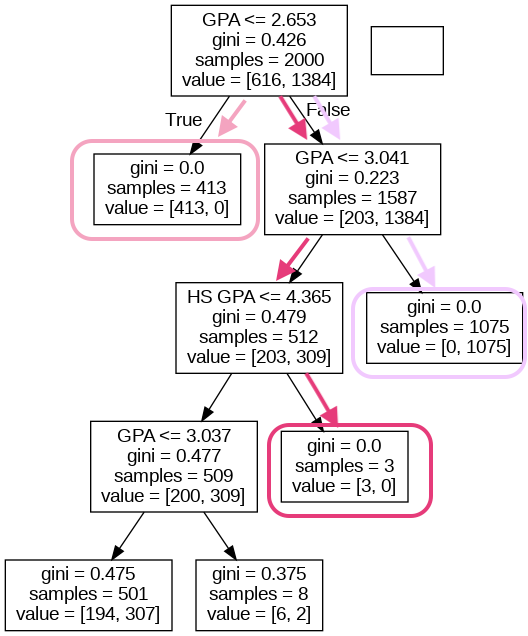

# **PREGUNTA 8**

Determinar las reglas a las que pertenecen los individuos de pronóstico (Hoja 2).

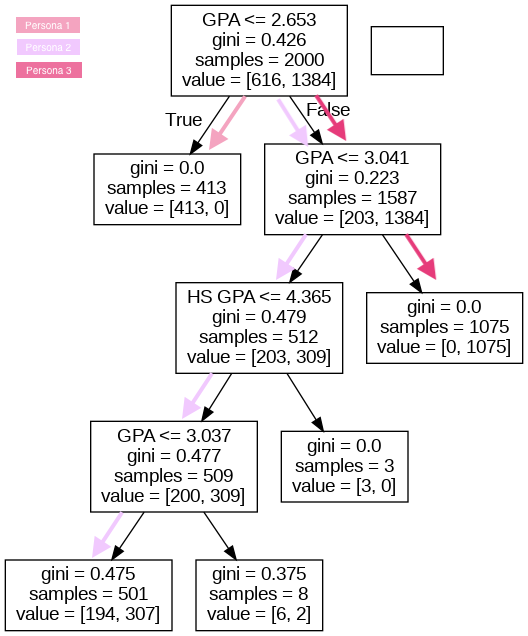

# **PREGUNTA 9**

*Agrupamiento de KMEANS*

Determinar los clusters que lograron la mayor calificación en la preparatoria (HS GPA) y el promedio de la calificación en la Universidad (GPA)

In [ ]:
nxl='/content/sample_data/4. BD_Parcial__int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna() #Eliminar celdas vacias o sin datos
XDB['Sex'] = XDB['Sex'].replace({'M':0,'F':1}) # Convertir la variable sex como una variable categorica

#Se procede con la seleccion de las variables de trabajo
XD=np.array(XDB.iloc[:,1:6]) #Datos entrada
yd=np.array(XDB.iloc[:,6]) #Dato que el modelo va a pronosticar

In [ ]:
np.random.seed(42)

#Modelo de KMeans
mkm = KMeans(n_clusters=5, init='random', random_state=42)
mkm.fit(XD,yd)  # Solo usas XD para entrenar

#Características de cada cluster
clusters = mkm.cluster_centers_
print('Las características de cada cluster son:\n', clusters)


Las características de cada cluster son:
 [[4.64684015e-01 3.63951673e+00 1.05312268e+03 2.70508550e+00
  7.32342007e-01]
 [6.40794224e-01 3.80368231e+00 1.19072202e+03 2.97076354e+00
  6.85920578e-01]
 [7.72540984e-01 3.96206967e+00 1.44682377e+03 3.16286475e+00
  6.59836066e-01]
 [7.28862974e-01 3.90004373e+00 1.30469388e+03 3.09267201e+00
  6.85131195e-01]
 [6.66666667e-01 2.62666667e+00 2.27373675e-13 2.87900000e+00
  6.66666667e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#Cluster 0
print(f'El HS GPA medio del cluster 0 es: {XD[mkm.labels_ == 0][: , 1].mean()}')
print(f'El GPA medio del cluster 0 es: {XD[mkm.labels_ == 0][: , 3].mean()}')
print('---')

#Cluster 1
print(f'El HS GPA medio del cluster 1 es: {XD[mkm.labels_ == 1][: , 1].mean()}')
print(f'El GPA medio del cluster 1 es: {XD[mkm.labels_ == 1][: , 3].mean()}')
print('---')

#Cluster 2
print(f'El HS GPA medio del cluster 2 es: {XD[mkm.labels_ == 2][: , 1].mean()}')
print(f'El GPA medio del cluster 2 es: {XD[mkm.labels_ == 2][: , 3].mean()}')
print('---')

#Cluster 3
print(f'El HS GPA medio del cluster 3 es: {XD[mkm.labels_ == 3][: , 1].mean()}')
print(f'El GPA medio del cluster 3 es: {XD[mkm.labels_ == 3][: , 3].mean()}')
print('---')

#Cluster 4
print(f'El HS GPA medio del cluster 4 es: {XD[mkm.labels_ == 4][: , 1].mean()}')
print(f'El GPA medio del cluster 4 es: {XD[mkm.labels_ == 4][: , 3].mean()}')
print('---')

El HS GPA medio del cluster 0 es: 3.6395167286245353
El GPA medio del cluster 0 es: 2.705085501858736
---
El HS GPA medio del cluster 1 es: 3.8036823104693136
El GPA medio del cluster 1 es: 2.970763537906137
---
El HS GPA medio del cluster 2 es: 3.9620696721311477
El GPA medio del cluster 2 es: 3.162864754098361
---
El HS GPA medio del cluster 3 es: 3.900043731778426
El GPA medio del cluster 3 es: 3.0926720116618074
---
El HS GPA medio del cluster 4 es: 2.6266666666666665
El GPA medio del cluster 4 es: 2.879
---


El cluster que logró la mayor calificación en ambas variables fue el cluster 2:

El HS GPA medio del cluster 2 es: 3.9621

El GPA medio del cluster 2 es: 3.1628

# **PREGUNTA 10**

*Ajustar un modelo KNN*

Compara el coeficiente de Exactitud, Sensibilidad y Especificidad alcanzado por este modelo y comparar su desempeño con los demás modelos.

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10) #Tomar 10 vecinos
mknn.fit(XD,yd) #Ajustar el modelo

#Evaluar el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print('Matriz de confusion:\n',cm)
print('---')

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print('Exactitud:',Exac)
print('Sensibilidad:',Sen)
print('Especificidad:',Spec)

Matriz de confusion:
 [[ 386  230]
 [  69 1315]]
---
Exactitud: 0.8505
Sensibilidad: 0.9501445086705202
Especificidad: 0.6266233766233766


In [ ]:
# Predecir nuevo punto
XDP = np.array([[1, 4, 1260, 1.9, 1]])
ydpp2 = mknn.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [0]


In [ ]:
XDP = np.array([[1, 2.91, 1090, 2.719, 1]])
ydpp2 = mknn.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [0]


In [ ]:
XDP = np.array([[0, 3.58, 1210, 3.319, 1]])
ydpp2 = mknn.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [1]


El modelo obtuvo una exactitud del 85.05%, lo que indica que el modelo tiene un buen rendimiento general. Con una alta sensibilidad del 95.01%, indica una excelente capacidad para identificar correctamente a los estudiantes que completarán sus estudios a tiempo. Sin embargo, su precisión disminuye al intentar identificar a aquellos que no lo lograrán, con una especificidad del 62.66%. En resumen, el modelo minimiza los falsos negativos y resulta en una mayor cantidad de falsos positivos.

Comparandolo con los otros modelos, este modelo, con una exactitud del 85.05%, es menos preciso que el árbol de decisión (90.2%) y el Naive Bayes (86.7%). Este modelo se destaca por su sensibilidad (95.01%), superior a la del Naive Bayes (92.63%) pero menor que la del árbol de decisión (99.86%), pero tiene una especificidad más baja (62.66%), en comparación con el Naive Bayes (73.37%) y el árbol de decisión (68.51%). En general, aunque este modelo es muy efectivo en identificar a los estudiantes que completarán su grado, tiene más dificultades para clasificar a quienes no lo lograrán, en comparación con los otros dos modelos.

# **PREGUNTA 11**

Cuál es el clúster que posee la mayor cantidad de personas que van a graduarse e indicar el porcentaje de graduación.

In [ ]:
#Total de individuos por cluster
print(f"Cluster 0: {len(np.where(mkm.labels_ == 0)[0])} individuos")
print(f"Cluster 1: {len(np.where(mkm.labels_ == 1)[0])} individuos")
print(f"Cluster 2: {len(np.where(mkm.labels_ == 2)[0])} individuos")
print(f"Cluster 3: {len(np.where(mkm.labels_ == 3)[0])} individuos")
print(f"Cluster 4: {len(np.where(mkm.labels_ == 4)[0])} individuos")

Cluster 0: 269 individuos
Cluster 1: 554 individuos
Cluster 2: 488 individuos
Cluster 3: 686 individuos
Cluster 4: 3 individuos


In [ ]:
#Total de individuos que SI van a graduarse por cluster
print(f"Cluster 0: {len(np.where((mkm.labels_ == 0) & (yd == 1))[0])} individuos")
print(f"Cluster 1: {len(np.where((mkm.labels_ == 1) & (yd == 1))[0])} individuos")
print(f"Cluster 2: {len(np.where((mkm.labels_ == 2) & (yd == 1))[0])} individuos")
print(f"Cluster 3: {len(np.where((mkm.labels_ == 3) & (yd == 1))[0])} individuos")
print(f"Cluster 4: {len(np.where((mkm.labels_ == 4) & (yd == 1))[0])} individuos")

Cluster 0: 131 individuos
Cluster 1: 371 individuos
Cluster 2: 370 individuos
Cluster 3: 510 individuos
Cluster 4: 2 individuos


In [ ]:
#Porcentajes Cluster 0
c00 = len(np.where((mkm.labels_ == 0) & (yd == 0))[0])
c01 = len(np.where((mkm.labels_ == 0) & (yd == 1))[0])
print('Porcentaje de NO graduados para el cluster 0:', c00 / (c00 + c01))
print('Porcentaje de SI graduados para el cluster 0:', c01 / (c00 + c01))
print('---')

# Porcentajes Cluster 1
c10 = len(np.where((mkm.labels_ == 1) & (yd == 0))[0])
c11 = len(np.where((mkm.labels_ == 1) & (yd == 1))[0])
print('Porcentaje de NO graduados para el cluster 1:', c10 / (c10 + c11))
print('Porcentaje de SI graduados para el cluster 1:', c11 / (c10 + c11))
print('---')

# Porcentajes Cluster 2
c20 = len(np.where((mkm.labels_ == 2) & (yd == 0))[0])
c21 = len(np.where((mkm.labels_ == 2) & (yd == 1))[0])
print('Porcentaje de NO graduados para el cluster 2:', c20 / (c20 + c21))
print('Porcentaje de SI graduados para el cluster 2:', c21 / (c20 + c21))
print('---')

# Porcentajes Cluster 3
c30 = len(np.where((mkm.labels_ == 3) & (yd == 0))[0])
c31 = len(np.where((mkm.labels_ == 3) & (yd == 1))[0])
print('Porcentaje de NO graduados para el cluster 3:', c30 / (c30 + c31))
print('Porcentaje de SI graduados para el cluster 3:', c31 / (c30 + c31))
print('---')

# Porcentajes en el cluster 4
c40 = len(np.where((mkm.labels_ == 4) & (yd == 0))[0])
c41 = len(np.where((mkm.labels_ == 4) & (yd == 1))[0])
print('Porcentaje de NO graduados para el cluster 4:', c40 / (c40 + c41))
print('Porcentaje de SI graduados para el cluster 4:', c41 / (c40 + c41))
print('---')

Porcentaje de NO graduados para el cluster 0: 0.5130111524163569
Porcentaje de SI graduados para el cluster 0: 0.48698884758364314
---
Porcentaje de NO graduados para el cluster 1: 0.3303249097472924
Porcentaje de SI graduados para el cluster 1: 0.6696750902527075
---
Porcentaje de NO graduados para el cluster 2: 0.24180327868852458
Porcentaje de SI graduados para el cluster 2: 0.7581967213114754
---
Porcentaje de NO graduados para el cluster 3: 0.2565597667638484
Porcentaje de SI graduados para el cluster 3: 0.7434402332361516
---
Porcentaje de NO graduados para el cluster 4: 0.3333333333333333
Porcentaje de SI graduados para el cluster 4: 0.6666666666666666
---


El cluster con mayor cantidad de personas que van a graduarse es el numero 3.

Porcentaje de graduación del cluster 3: 74.3440%

# **PREGUNTA 12**

Determinar el clúster al que pertenecen cada uno de los estudiantes que hacen parte de la hoja de pronóstico.

In [ ]:
# Predecir nuevo punto
XDP = np.array([[1, 4, 1260, 1.9, 1]])
ydpp2 = mkm.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [3]


In [ ]:
XDP = np.array([[1, 2.91, 1090, 2.719, 1]])
ydpp2 = mkm.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [0]


In [ ]:
XDP = np.array([[ 0, 3.58, 1210, 3.319, 1]])
ydpp2 = mkm.predict(XDP)
print('Cluster:', ydpp2)

Cluster: [1]


Persona 1: Cluster 3

Persona 2: Cluster 0

Persona 3: Cluster 1